<a href="https://colab.research.google.com/github/Jee-9/Study/blob/main/ResNet50_PyTorch_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torchvision
import torchvision.transforms as transforms

####

import torch
import torch.nn as nn
import torch.optim as optim

from PIL import Image
%matplotlib inline
import matplotlib

import numpy as np
import pandas as pd

from torch.utils.data import DataLoader

import os
import warnings
warnings.filterwarnings(action = 'ignore')

# call data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trans = transforms.Compose([transforms.Resize((224,224)),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)) # 이거 Normalize 의미 뭐지 아래에 unnormalize랑 같이 이해 잘 안됨 ㅠ
                            # 걍 랜덤값 넣었다고 합니당. 의미 XX 나중에 바꿔서 Normalize 해주는 방법도 있음
                            ])

# trainset
train_set = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/CNN_model_training_data', transform = trans)

In [ ]:
# testset

test_set = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/PROJECTS/YouTube API Project/test', transform = trans)

# data loader

In [ ]:
BS = 10

# torch tensor를 batch size만큼 묶어준다
def collate_fn(batch):
  images, labels, img_ids = zip(*batch)
  return torch.cat([img.reshape(-1, 3, 224, 224) for img in images], 0), torch.tensor(labels)

# 데이터를 Torch DataLoader 형식으로 변환
trainloader = DataLoader(train_set, batch_size = BS, shuffle = True, num_workers = 0, collate_fn = collate_fn)
testloader = DataLoader(test_set, batch_size = BS, shuffle = False, num_workers = 0, collate_fn = collate_fn)

"""
torch dataset에서 이미지를 불러오면서 tensor로 바꾸게 되는데, 반환된 결과값이 tuple로 묶인 tensor임.
원하는 모양은 (batch_size, channel(RGB), height, width)이기 때문에 collate_fn으로 바꿔주는 코드를 넣어줘야 함.
"""

'\ntorch dataset에서 이미지를 불러오면서 tensor로 바꾸게 되는데, 반환된 결과값이 tuple로 묶인 tensor임.\n원하는 모양은 (batch_size, channel(RGB), height, width)이기 때문에 collate_fn으로 바꿔주는 코드를 넣어줘야 함.\n'

# Visualization

In [ ]:
def imshow(img):
  img = img/2 + 0.5
  np_img = img.numpy()
  plt.imshow(np.transpose(np_img, (1,2,0)))

  print(np_img.shape)
  print((np.transpose(np_img, (1,2,0))).shape)

In [ ]:
# dataiter = iter(trainloader)
# images, labels = dataiter.next()
# print(labels)
# iteration을 통해 trainloader에 있는 데이터들을 한 batch씩 꺼내어 확인할 수 있다.
# labels를 출력해보면 0이 1개, 1이 2개, 2가 1개, 3이 5개인 것을 확인해볼 수 있다.  -> 이거 batch 16으로 해서 수정됨.


# print(images.shape)
# imshow(torchvision.utils.make_grid(images, nrow = 5))
# print(images.shape)
# print((torchvision.utils.make_grid(images)).shape)
# print("".join("%5s "%classes[labels[j]]for j in range(10)))

# Modeling

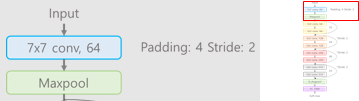

In [ ]:
# def conv_start():
#   return nn.Sequential(
#       nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=4),
#       nn.BatchNorm2d(64),
#       nn.ReLU(inplace=True),
#       nn.MaxPool2d(kernel_size=3, stride=2)
#   )

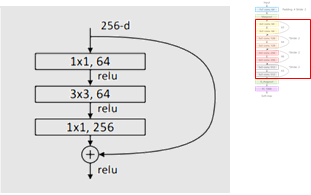

In [ ]:
# def bottleneck_block(in_dim, mid_dim, out_dim, down=False):
#   layers = []
#   if down:
#     layers.append(nn.Conv2d(in_dim, mid_dim, kernel_size=1, stride=2, padding=0))
#   else:
#     layers.append(nn.Conv2d(in_dim, mid_dim, kernel_size=1, stride=1, padding=0))
#   layers.extend([
#                  nn.BatchNorm2d(mid_dim),
#                  nn.ReLU(inplace=True),
#                  nn.Conv2d(mid_dim, mid_dim, kernel_size=3, stride=1, padding=1),
#                  nn.BatchNorm2d(mid_dim),
#                  nn.ReLU(inplace=True),
#                  nn.Conv2d(mid_dim, out_dim, kernel_size=1, stride=1, padding=0),
#                  nn.BatchNorm2d(out_dim)
#   ])
#   return nn.Sequential(*layers)

In [ ]:
# class Battleneck(nn.Module):
#   def __init__(self, in_dim, mid_dim, out_dim, down:bool = False, starting:bool = False) -> None:
#     super(Bottleneck, self).__init__()
#     if starting:
#       down = False
#     self.block = bottleneck_block(in_dim, mid_dim, out_dim, down=down)
#     self.relu = nn.ReLU(inplace = True)
#     if down:
#       conn_layer = nn.Conv2d(in_dim, out_dim, kernel_size=1, stride=2, padding=0),
#     else:
#       conn_layer = nn.Conv2d(in_dim, out_dim, kernel_size=1, stride=1, padding=0),

#     self.changedim = nn.Sequential(conn_alyer, nn.BatchNorm2d(out_dim))

#   def forward(self, x):
#     identity = self.changedim(x)
#     x = self.block(x)
#     x += identity
#     x = self.relu(x)
#     return x

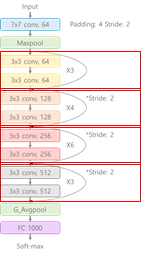

In [ ]:
# def make_layer(in_dim, mid_dim, out_dim, repeats, starting = False):
#   layers = []
#   layers.append(Bottleneck(in_dim, mid_dim, out_dim, down=True, starting=starting))
#   for _ in range(1, repeats):
#     layers.append(Bottleneck(out_dim, mid_dim, out_dim, down = False))
#   return nn.Sequential(*layers)

In [ ]:
# class ResNet(nn.Module):
#   def __init__(self, repeats:list = [3,4,6,3], num_classes=1000):
#     super(ResNet, self).__init__()
#     self.num_classes = num_classes
#     # 1번
#     self.conv1 = conv_start()

#     # 2번
#     base_dim = 64
#     self.conv2 = make_layer(base_dim, base_dim, base_dim*4, repeats[0])
#     self.conv3 = make_layer(base_dim*4, base_dim*2, base_dim*8, repeats[1])
#     self.conv4 = make_layer(base_dim*8, base_dim*4, base_dim*16, repeats[2])
#     self.conv5 = make_layer(base_dim*16, base_dim*8, base_dim*32, repeats[3])

#     # 3번
#     self.avgpool = nn.AvgPool2d(kernel_size=7, stride=1)
#     self.classifier = nn.Linear(2048, self.num_classes)

#   def forward(self, x):
#     x = self.conv1(x)
#     x = self.conv2(x)
#     x = self.conv3(x)
#     x = self.conv4(x)
#     x = self.conv5(x)
#     x = self.avgpool(x)
#     x = x.view(x.size(0), -1)
#     x = self.classifier(x)
#     return x

- reference : https://wolfy.tistory.com/243

# Modeling 다시

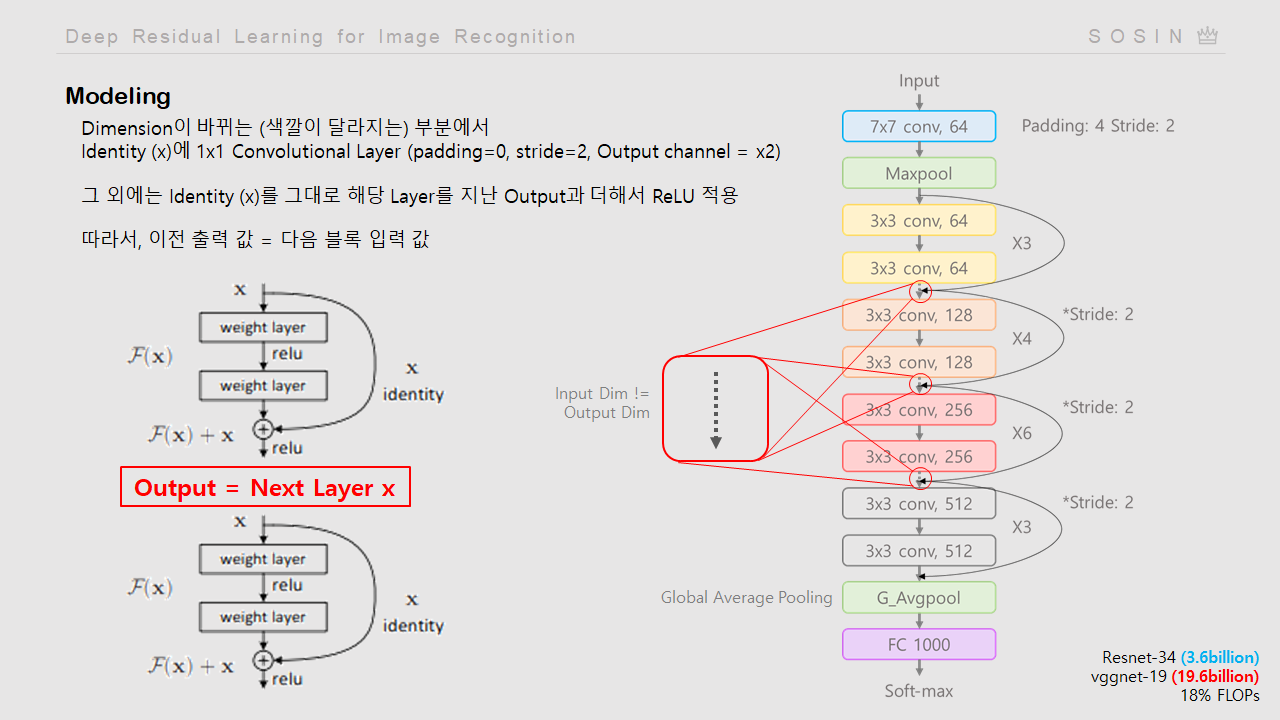

In [ ]:
# conv_block
def conv_block(): # conv_block : skip connection이 일어나기 전 부분
  return nn.Sequential(
   nn.Conv2d(3, 64, kernel_size=7,stride=2, padding=4),
   nn.BatchNorm2d(64),
   nn.ReLU(inplace=True),
   nn.MaxPool2d(kernel_size=3, stride=2)
  ) # 여기서 224*224*3 image가 56*56*64 image로 변환된다

In [ ]:
# bottleneck block
def bottleneck_block(in_dim, mid_dim, out_dim, down=False):
  # down = False 다운샘플링을 할것인가 말것인가? 
  
  layers = []
  if down:
    layers.append(nn.Conv2d(in_dim, mid_dim, kernel_size=1, stride=2, padding=0))
  else:
    layers.append(nn.Conv2d(in_dim, mid_dim, kernel_size=1, stride=1, padding=0))
  # downsampling을 위해서 stride=2를 주겠다고 선언

  layers.append([
                 nn.BatchNorm2d(mid_dim),
                 nn.ReLU(inplace=True), #여기 inplace = True 왜 주는거지? 안주면 ..?
                 nn.Conv2d(mid_dim, mid_dim, kernel_size=3, stride=1, padding=1),
                 nn.BatchNorm2d(mid_dim),
                 nn.ReLU(inplace=True),
                 nn.Conv2d(mid_dim, out_dim, kernel_size=1, stride=1, padding=0),
                 nn.BatchNorm2d(out_dim),
  ])
  return nn.Sequential(*layers) # 이 별 왜 붙이는 거람?

  """
  input dimension, mid dimension, output_dimension 을 입력받고 convolution network 를 만들어서
  downsampling 할 것인지 그렇지 않을 것인지 stride 값을 변경할 수 있게 제작
  """

In [ ]:
class Bottleneck(nn.Module):
  def __init__(self, in_dim, mid_dim, out_dim, down:bool = False, starting:bool=False) -> None:
    super(Bottleneck, self).__init__()
    if starting: # 가장 처음의 maxpool을 지나고 56*56*64 image가 그대로 bottleneck의 identity로 들어가기 때문에
                 # down sizing이 일어나지 않아 이를 명시해주고자 추가.
      down = False
    self.block = bottleneck_block(in_dim, mid_dim, out_dim, down=down)
    self.relu = nn.ReLU(inplace = True)
    if down:
      conn_layer = nn.Conv2d(in_dim, out_dim, kernel_size=1, stride=2, padding=0), # size가 줄어든다
    else:
      conn_layer = nn.Conv2d(in_dim, out_dim, kernel_size=1, stride=1, padding=0),

    self.changedim = nn.Sequential(conn_layer, nn.BatchNorm2d(out_dim))


    def forward(self, x):
      identity = self.changedim(x)
      x = self.block(x)
      x += identity
      x = self.relu(x)
      return x

In [ ]:
def make_layer(in_dim, mid_dim, out_dim, repeats, starting=False):
  layers=[]
  layers.append(Bottleneck(in_dim, mid_dim, out_dim, down=True, starting=starting))
  for _ in range(1, repeats):
    layers.append(Bottleneck(out_dim, mid_dim, out_dim, down=False))
  return nn.Sequential(*layers)

In [ ]:
make_layer(3,3,3,1)

TypeError: ignored

No, it is not. Try it yourself and you'll see that it would have worked, even if you choose list as the variable name, which you well pointed one should not. The only reason that error is thrown is if list=[[...]]. Try with list=[nn.Module()] and you'll see it works. list is not a keyword, it is a type.

In [ ]:
class ResNet(nn.Module):
  def __init__(self, repeats:list = [3,4,6,3], num_classes = 4):
    super(ResNet, self).__init__()
    self.num_classes = num_classes
    
    # 1번
    self.conv1 = conv_block()

    # 2번
    base_dim = 64
    self.conv2 = make_layer(base_dim, base_dim, base_dim*4, repeats[0], starting=True)
    self.conv3 = make_layer(base_dim*4, base_dim*2, base_dim*8, repeats[1])
    self.conv4 = make_layer(base_dim*8, base_dim*4, base_dim*16, repeats[2])
    self.conv5 = make_layer(base_dim*16, base_dim*8, base_dim*32, repeats[3])

    # 3번
    self.avgpool = nn.AvgPool2d(kernel_size=7, stride=1)
    self.classifier = nn.Linear(2048, self.num_classes)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = self.conv5(x)
    x = self.avgpool(x)

    # 3번 2048*1 -> 1*2048
    x = x.view(x.size(0), -1)
    x = self.classifier(x)
    return x

# Load Model & Optimizing function

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.manual_seed(53)
if device == 'cuda':
  torch.cuda.manual_seed_all(53)

In [ ]:
# Load Model
resnet = ResNet(num_classes = 4)
# resnet = ResNet(repeats=[3,4,23,3], num_classes = 4) # 101 Layer
resnet = resnet.to(device)

# optimization
criterion = nn.CrossEntropyLoss().cuda()
# optimizer = optim.SGD(resnet.parameters(), lr = 0.01, momentum=0.9, weight_decay=0.0005)
optimizer = optim.SGD(resnet.parameters(), lr=0.01, momentum=0.9)

TypeError: ignored

# training

In [ ]:
import time

